# Classify MNIST - Written Digit Classification

## Import Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) >= 1:
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## 1. Load in the MNIST dataset and examine its structure.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# initial mnist image shape
print(tf.shape(train_images))
print(tf.shape(test_images))
print(tf.shape(train_labels))
print(tf.shape(test_labels))

tf.Tensor([60000    28    28], shape=(3,), dtype=int32)
tf.Tensor([10000    28    28], shape=(3,), dtype=int32)
tf.Tensor([60000], shape=(1,), dtype=int32)
tf.Tensor([10000], shape=(1,), dtype=int32)


In [4]:
# initial mnist image shape
print(tf.shape(train_labels))

tf.Tensor([60000], shape=(1,), dtype=int32)


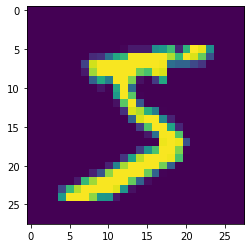

In [5]:
plt.imshow(train_images[0])

## 2. Using NumPy or other libraries, prepare your dataset for training.

In [6]:
# reshape and normalize images for use with cnn layer
x_train = tf.reshape(train_images, [len(train_images), 28, 28, 1])
x_train = tf.cast(x_train, dtype=tf.float32) / 255

x_test = tf.reshape(test_images, [len(test_images), 28, 28, 1])
x_test = tf.cast(x_test, dtype=tf.float32) / 255

print(tf.shape(x_train))
print(tf.shape(x_test))

tf.Tensor([60000    28    28     1], shape=(4,), dtype=int32)
tf.Tensor([10000    28    28     1], shape=(4,), dtype=int32)


In [7]:
# one hot encode labels
y_train = tf.one_hot(train_labels, 10)
y_test = tf.one_hot(test_labels, 10)

print(train_labels[0])
print(y_train[0])

5
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


## 3. Create a Sequential Model

- Input: 28 x 28 x 1
- CNN: kernal 3x3, 64 filters, ReLU Activation
- CNN: kernal 3x3, 32 filters, ReLU Activation
- Max Pool: 2x2
- Dropout: 0.25
- Dense: 128
- Dropout: 0.5
- Dense: 10

In [8]:
model = Sequential(name="mnist")
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 12, 12, 128)       4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0     

## 4. Train this CNN on the MNIST dataset

- Train for at least 5 epochs using a batch size of 32

In [11]:
epochs = 5
batch_size = 32

with tf.device('/device:GPU:0'):
    model.fit(x_train,
              y_train,
              validation_data=(x_test, y_test),
              epochs=epochs,
              batch_size=batch_size,
              shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1526 - accuracy: 0.9539 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.0470 - val_accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0486 - val_accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0390 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.0465 - val_accuracy: 0.9867


## 5. Plot graphs showing how your training and validation loss and accuracy changed with respect to the epochs completed

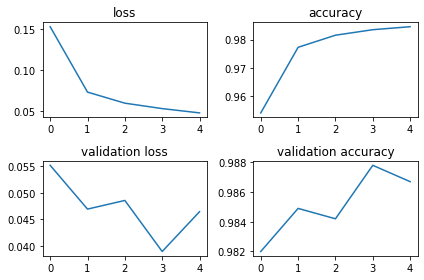

In [12]:
history = model.history.history

fig = plt.figure()

loss = fig.add_subplot(221)
loss.set_title('loss')
loss.plot(history['loss'])

accuracy = fig.add_subplot(222)
accuracy.set_title('accuracy')
accuracy.plot(history['accuracy'])

val_loss = fig.add_subplot(223)
val_loss.set_title('validation loss')
val_loss.plot(history['val_loss'])

val_accuracy = fig.add_subplot(224)
val_accuracy.set_title('validation accuracy')
val_accuracy.plot(history['val_accuracy'])

plt.tight_layout()
plt.show(fig)

## 6. Save your model

In [13]:
model.save('classify_mnist.h5')

## 7. Test your model on some random samples from the test dataset

6


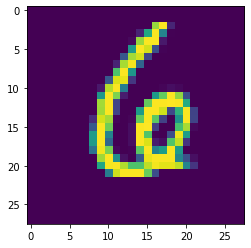

In [14]:
test_image = 123

pred = model.predict(tf.convert_to_tensor([x_test[test_image]]))
plt.imshow(test_images[test_image])
print(np.argmax(pred))

8


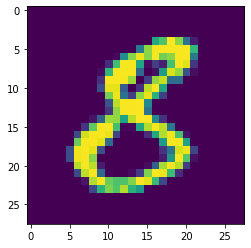

In [15]:
test_image = 1234

pred = model.predict(tf.convert_to_tensor([x_test[test_image]]))
plt.imshow(test_images[test_image])
print(np.argmax(pred))

6


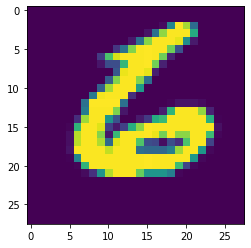

In [16]:
test_image = 9999

pred = model.predict(tf.convert_to_tensor([x_test[test_image]]))
plt.imshow(test_images[test_image])
print(np.argmax(pred))